In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('BACE1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Cricetulus griseus,Beta-secretase 1,11.0,False,CHEMBL3297642,"[{'accession': 'G3IAK4', 'component_descriptio...",SINGLE PROTEIN,10029
1,"[{'xref_id': 'Beta-secretase_1', 'xref_name': ...",Homo sapiens,Beta-secretase 1,10.0,False,CHEMBL4822,"[{'accession': 'P56817', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P56818', 'xref_name': None, 'xre...",Mus musculus,Beta-secretase 1,10.0,False,CHEMBL4593,"[{'accession': 'P56818', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Rattus norvegicus,Beta-secretase 1,10.0,False,CHEMBL3259473,"[{'accession': 'P56819', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Homo sapiens,Beta-secretase (BACE),6.0,False,CHEMBL2111390,"[{'accession': 'Q9Y5Z0', 'component_descriptio...",PROTEIN FAMILY,9606


In [3]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL4822'

In [4]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [5]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,None,20706840,[],CHEMBL4628349,Inhibition of BACE1 (unknown origin) assessed ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,170.0
10179,None,20706849,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,1.5
10180,None,20706850,[],CHEMBL4628349,Inhibition of BACE1 (unknown origin) assessed ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,3.5
10181,None,20706859,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,2.5


In [247]:
df.to_csv('BACE1_01_bioactivity_data_raw.csv', index=False)

In [6]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,None,20706840,[],CHEMBL4628349,Inhibition of BACE1 (unknown origin) assessed ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,170.0
10179,None,20706849,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,1.5
10180,None,20706850,[],CHEMBL4628349,Inhibition of BACE1 (unknown origin) assessed ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,3.5
10181,None,20706859,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,2.5


In [8]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,None,20706814,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,8.9
10175,None,20706829,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,3.5
10177,None,20706839,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,79.4
10179,None,20706849,[],CHEMBL4628348,Inhibition of BACE1 (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,1.5


# data preprocessing

In [16]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.reset_index(drop=True, inplace=True)
df4 = df3

In [17]:
df4

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0
...,...,...,...
7074,CHEMBL4643511,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...,8.9
7075,CHEMBL4637358,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...,3.5
7076,CHEMBL4635770,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...,79.4
7077,CHEMBL4648883,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...,1.5


In [18]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [19]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate
...,...,...,...,...
7074,CHEMBL4643511,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...,8.9,active
7075,CHEMBL4637358,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...,3.5,active
7076,CHEMBL4635770,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...,79.4,active
7077,CHEMBL4648883,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...,1.5,active


In [21]:
df_no_smiles = df5.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL406146,413.0,active
1,CHEMBL78946,2.0,active
2,CHEMBL324109,460.0,active
3,CHEMBL114147,9000.0,intermediate
4,CHEMBL419949,5600.0,intermediate
...,...,...,...
7074,CHEMBL4643511,8.9,active
7075,CHEMBL4637358,3.5,active
7076,CHEMBL4635770,79.4,active
7077,CHEMBL4648883,1.5,active


In [27]:
smiles = []

for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)


smiles = pd.Series(smiles, name = 'canonical_smiles')

In [28]:
smiles

0       CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...
1       CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...
2       CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...
3       CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...
4       CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...
                              ...                        
7074    NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...
7075    NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...
7076    NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...
7077    C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...
7078    NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CO[...
Name: canonical_smiles, Length: 7079, dtype: object

In [36]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL406146,413.0,active,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...
1,CHEMBL78946,2.0,active,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...
2,CHEMBL324109,460.0,active,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...
3,CHEMBL114147,9000.0,intermediate,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...
4,CHEMBL419949,5600.0,intermediate,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...
...,...,...,...,...
7074,CHEMBL4643511,8.9,active,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...
7075,CHEMBL4637358,3.5,active,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...
7076,CHEMBL4635770,79.4,active,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...
7077,CHEMBL4648883,1.5,active,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...


In [33]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [34]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [35]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
7074,429.349,3.1249,2.0,6.0
7075,453.396,2.8018,2.0,7.0
7076,453.396,2.8018,2.0,7.0
7077,467.423,3.1903,2.0,7.0


In [44]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [45]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active,999.085,-1.4355,13.0,13.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active,893.005,-1.7361,12.0,12.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active,751.988,2.3535,8.0,9.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate,737.895,1.9626,8.0,8.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...
7074,CHEMBL4643511,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...,8.9,active,429.349,3.1249,2.0,6.0
7075,CHEMBL4637358,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...,3.5,active,453.396,2.8018,2.0,7.0
7076,CHEMBL4635770,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...,79.4,active,453.396,2.8018,2.0,7.0
7077,CHEMBL4648883,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...,1.5,active,467.423,3.1903,2.0,7.0


In [40]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [49]:
df_combined['standard_value'] = df_combined.standard_value.astype(float)
df_combined.standard_value.describe()

count    7.079000e+03
mean     4.161518e+04
std      1.125263e+06
min      2.000000e-04
25%      2.900000e+01
50%      2.500000e+02
75%      3.190000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

In [50]:
df_combined['standard_value']

0        413.0
1          2.0
2        460.0
3       9000.0
4       5600.0
         ...  
7074       8.9
7075       3.5
7076      79.4
7077       1.5
7078       2.5
Name: standard_value, Length: 7079, dtype: float64

In [51]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [53]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5600.0
...,...,...,...,...,...,...,...,...
7074,CHEMBL4643511,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...,active,429.349,3.1249,2.0,6.0,8.9
7075,CHEMBL4637358,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...,active,453.396,2.8018,2.0,7.0,3.5
7076,CHEMBL4635770,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...,active,453.396,2.8018,2.0,7.0,79.4
7077,CHEMBL4648883,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...,active,467.423,3.1903,2.0,7.0,1.5


In [54]:
df_norm.standard_value_norm.describe()

count    7.079000e+03
mean     4.161518e+04
std      1.125263e+06
min      2.000000e-04
25%      2.900000e+01
50%      2.500000e+02
75%      3.190000e+03
max      8.600000e+07
Name: standard_value_norm, dtype: float64

In [55]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
7074,CHEMBL4643511,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...,active,429.349,3.1249,2.0,6.0,8.050610
7075,CHEMBL4637358,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...,active,453.396,2.8018,2.0,7.0,8.455932
7076,CHEMBL4635770,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...,active,453.396,2.8018,2.0,7.0,7.100179
7077,CHEMBL4648883,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...,active,467.423,3.1903,2.0,7.0,8.823909


In [56]:
df_final.pIC50.describe()

count    7079.000000
mean        6.489045
std         1.390914
min         1.065502
25%         5.496211
50%         6.602060
75%         7.537602
max        12.698970
Name: pIC50, dtype: float64

In [57]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
7074,CHEMBL4643511,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...,active,429.349,3.1249,2.0,6.0,8.050610
7075,CHEMBL4637358,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...,active,453.396,2.8018,2.0,7.0,8.455932
7076,CHEMBL4635770,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...,active,453.396,2.8018,2.0,7.0,7.100179
7077,CHEMBL4648883,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...,active,467.423,3.1903,2.0,7.0,8.823909


In [58]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

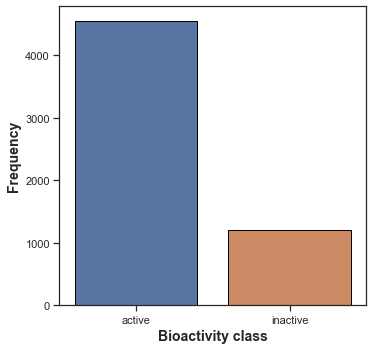

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

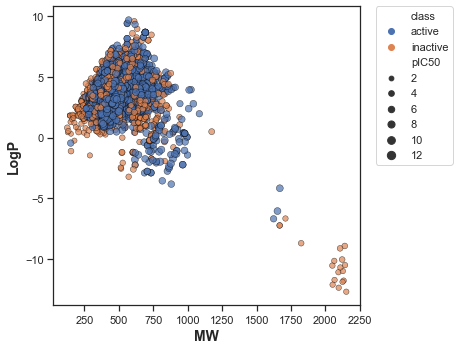

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

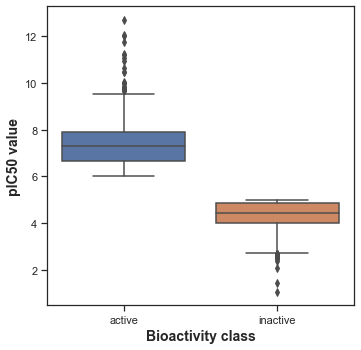

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [62]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [63]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


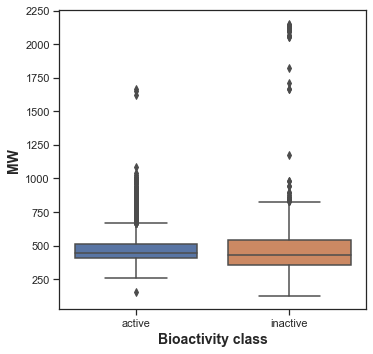

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [65]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2378840.0,2.487869e-12,0.05,Different distribution (reject H0)


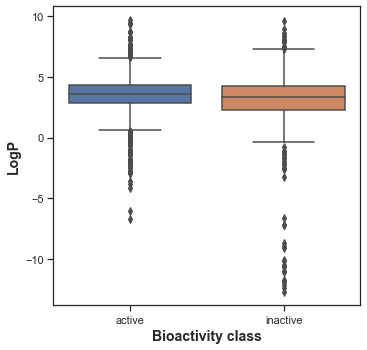

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [67]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2406601.5,9.829173e-11,0.05,Different distribution (reject H0)


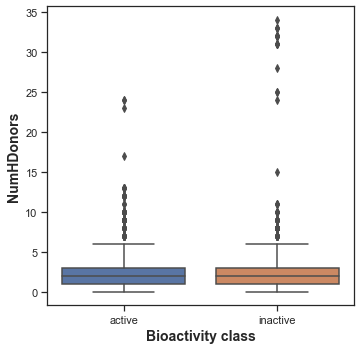

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [69]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2570956.0,0.000476,0.05,Different distribution (reject H0)


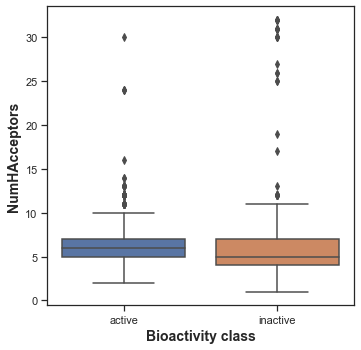

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [71]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2388289.5,3.705456e-12,0.05,Different distribution (reject H0)


In [72]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
7074,CHEMBL4643511,NC1=N[C@](CF)(c2cc(NC(=O)c3cnc(OCF)cn3)ccc2F)C...,active,429.349,3.1249,2.0,6.0,8.050610
7075,CHEMBL4637358,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)COC...,active,453.396,2.8018,2.0,7.0,8.455932
7076,CHEMBL4635770,NC1=N[C@@]2(c3cc(NC(=O)c4cnc(OCF)cn4)ccc3F)CCO...,active,453.396,2.8018,2.0,7.0,7.100179
7077,CHEMBL4648883,C[C@H]1C[C@H]2CC(F)(F)C(N)=N[C@@]2(c2cc(NC(=O)...,active,467.423,3.1903,2.0,7.0,8.823909


In [75]:
selection = ['canonical_smiles','molecule_chembl_id']
df_final_selection = df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [77]:
! cat molecule.smi | head -5

CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O)O)C(C)C)C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(=O)O	CHEMBL406146
CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O)O)C(C)C)[C@@H](O)C[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(=O)O	CHEMBL78946
CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H](O)CC(=O)NC(CCSC)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C	CHEMBL324109
CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)N[C@@H](CC1CCCCC1)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C	CHEMBL114147
CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)N[C@@H](CC1CCCCC1)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C	CHEMBL419949
cat: stdout: Broken pipe


In [78]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [79]:
! bash padel.sh

Processing CHEMBL406146 in molecule.smi (1/7079). 
Processing CHEMBL78946 in molecule.smi (2/7079). 
Processing CHEMBL324109 in molecule.smi (3/7079). 
Processing CHEMBL114147 in molecule.smi (4/7079). 
Processing CHEMBL419949 in molecule.smi (5/7079). 
Processing CHEMBL116826 in molecule.smi (6/7079). 
Processing CHEMBL143239 in molecule.smi (7/7079). 
Processing CHEMBL332948 in molecule.smi (8/7079). 
Processing CHEMBL51386 in molecule.smi (9/7079). 
Processing CHEMBL332260 in molecule.smi (10/7079). 
Processing CHEMBL2370886 in molecule.smi (11/7079). 
Processing CHEMBL142715 in molecule.smi (12/7079). 
Processing CHEMBL114169 in molecule.smi (16/7079). Average speed: 1.64 s/mol.
Processing CHEMBL290001 in molecule.smi (14/7079). Average speed: 4.75 s/mol.
Processing CHEMBL326488 in molecule.smi (13/7079). Average speed: 4.75 s/mol.
Processing CHEMBL324122 in molecule.smi (15/7079). Average speed: 1.64 s/mol.
Processing CHEMBL143687 in molecule.smi (17/7079). Average speed: 1.28 s/m

Processing CHEMBL50930 in molecule.smi (111/7079). Average speed: 0.16 s/mol.
Processing CHEMBL300665 in molecule.smi (112/7079). Average speed: 0.16 s/mol.
Processing CHEMBL297739 in molecule.smi (113/7079). Average speed: 0.15 s/mol.
Processing CHEMBL299351 in molecule.smi (114/7079). Average speed: 0.15 s/mol.
Processing CHEMBL51188 in molecule.smi (115/7079). Average speed: 0.15 s/mol.
Processing CHEMBL53919 in molecule.smi (116/7079). Average speed: 0.15 s/mol.
Processing CHEMBL54083 in molecule.smi (117/7079). Average speed: 0.15 s/mol.
Processing CHEMBL300657 in molecule.smi (118/7079). Average speed: 0.15 s/mol.
Processing CHEMBL297486 in molecule.smi (119/7079). Average speed: 0.15 s/mol.
Processing CHEMBL48843 in molecule.smi (120/7079). Average speed: 0.15 s/mol.
Processing CHEMBL49989 in molecule.smi (121/7079). Average speed: 0.15 s/mol.
Processing CHEMBL33417 in molecule.smi (122/7079). Average speed: 0.15 s/mol.
Processing CHEMBL53648 in molecule.smi (123/7079). Average 

Processing CHEMBL373255 in molecule.smi (216/7079). Average speed: 0.12 s/mol.
Processing CHEMBL370369 in molecule.smi (217/7079). Average speed: 0.12 s/mol.
Processing CHEMBL370801 in molecule.smi (218/7079). Average speed: 0.12 s/mol.
Processing CHEMBL383772 in molecule.smi (219/7079). Average speed: 0.12 s/mol.
Processing CHEMBL201730 in molecule.smi (220/7079). Average speed: 0.12 s/mol.
Processing CHEMBL201961 in molecule.smi (221/7079). Average speed: 0.12 s/mol.
Processing CHEMBL201155 in molecule.smi (222/7079). Average speed: 0.12 s/mol.
Processing CHEMBL202057 in molecule.smi (223/7079). Average speed: 0.12 s/mol.
Processing CHEMBL201940 in molecule.smi (224/7079). Average speed: 0.12 s/mol.
Processing CHEMBL201049 in molecule.smi (225/7079). Average speed: 0.12 s/mol.
Processing CHEMBL201802 in molecule.smi (226/7079). Average speed: 0.12 s/mol.
Processing CHEMBL202602 in molecule.smi (227/7079). Average speed: 0.12 s/mol.
Processing CHEMBL202015 in molecule.smi (228/7079). 

Processing CHEMBL217374 in molecule.smi (321/7079). Average speed: 0.11 s/mol.
Processing CHEMBL214963 in molecule.smi (322/7079). Average speed: 0.11 s/mol.
Processing CHEMBL386666 in molecule.smi (323/7079). Average speed: 0.11 s/mol.
Processing CHEMBL217068 in molecule.smi (324/7079). Average speed: 0.11 s/mol.
Processing CHEMBL401587 in molecule.smi (325/7079). Average speed: 0.11 s/mol.
Processing CHEMBL403819 in molecule.smi (326/7079). Average speed: 0.11 s/mol.
Processing CHEMBL253237 in molecule.smi (327/7079). Average speed: 0.11 s/mol.
Processing CHEMBL402330 in molecule.smi (328/7079). Average speed: 0.11 s/mol.
Processing CHEMBL219601 in molecule.smi (329/7079). Average speed: 0.11 s/mol.
Processing CHEMBL218451 in molecule.smi (330/7079). Average speed: 0.11 s/mol.
Processing CHEMBL373423 in molecule.smi (331/7079). Average speed: 0.11 s/mol.
Processing CHEMBL386445 in molecule.smi (332/7079). Average speed: 0.11 s/mol.
Processing CHEMBL218846 in molecule.smi (333/7079). 

Processing CHEMBL231861 in molecule.smi (425/7079). Average speed: 0.10 s/mol.
Processing CHEMBL412852 in molecule.smi (426/7079). Average speed: 0.10 s/mol.
Processing CHEMBL236850 in molecule.smi (427/7079). Average speed: 0.10 s/mol.
Processing CHEMBL237494 in molecule.smi (428/7079). Average speed: 0.10 s/mol.
Processing CHEMBL391109 in molecule.smi (429/7079). Average speed: 0.10 s/mol.
Processing CHEMBL237493 in molecule.smi (430/7079). Average speed: 0.10 s/mol.
Processing CHEMBL237284 in molecule.smi (431/7079). Average speed: 0.10 s/mol.
Processing CHEMBL237283 in molecule.smi (432/7079). Average speed: 0.11 s/mol.
Processing CHEMBL391108 in molecule.smi (433/7079). Average speed: 0.11 s/mol.
Processing CHEMBL237282 in molecule.smi (434/7079). Average speed: 0.10 s/mol.
Processing CHEMBL237063 in molecule.smi (435/7079). Average speed: 0.10 s/mol.
Processing CHEMBL391087 in molecule.smi (436/7079). Average speed: 0.10 s/mol.
Processing CHEMBL237061 in molecule.smi (438/7079). 

Processing CHEMBL254625 in molecule.smi (530/7079). Average speed: 0.10 s/mol.
Processing CHEMBL401320 in molecule.smi (531/7079). Average speed: 0.10 s/mol.
Processing CHEMBL401319 in molecule.smi (532/7079). Average speed: 0.10 s/mol.
Processing CHEMBL251970 in molecule.smi (533/7079). Average speed: 0.10 s/mol.
Processing CHEMBL401318 in molecule.smi (534/7079). Average speed: 0.10 s/mol.
Processing CHEMBL400916 in molecule.smi (535/7079). Average speed: 0.10 s/mol.
Processing CHEMBL254634 in molecule.smi (536/7079). Average speed: 0.10 s/mol.
Processing CHEMBL254633 in molecule.smi (537/7079). Average speed: 0.10 s/mol.
Processing CHEMBL267053 in molecule.smi (538/7079). Average speed: 0.10 s/mol.
Processing CHEMBL399748 in molecule.smi (539/7079). Average speed: 0.10 s/mol.
Processing CHEMBL253557 in molecule.smi (540/7079). Average speed: 0.10 s/mol.
Processing CHEMBL253799 in molecule.smi (541/7079). Average speed: 0.10 s/mol.
Processing CHEMBL252351 in molecule.smi (542/7079). 

Processing CHEMBL399839 in molecule.smi (635/7079). Average speed: 0.10 s/mol.
Processing CHEMBL42908 in molecule.smi (636/7079). Average speed: 0.10 s/mol.
Processing CHEMBL270359 in molecule.smi (637/7079). Average speed: 0.10 s/mol.
Processing CHEMBL256679 in molecule.smi (639/7079). Average speed: 0.10 s/mol.
Processing CHEMBL403727 in molecule.smi (638/7079). Average speed: 0.10 s/mol.
Processing CHEMBL403253 in molecule.smi (640/7079). Average speed: 0.10 s/mol.
Processing CHEMBL403050 in molecule.smi (641/7079). Average speed: 0.10 s/mol.
Processing CHEMBL403109 in molecule.smi (642/7079). Average speed: 0.10 s/mol.
Processing CHEMBL403108 in molecule.smi (643/7079). Average speed: 0.10 s/mol.
Processing CHEMBL404369 in molecule.smi (644/7079). Average speed: 0.10 s/mol.
Processing CHEMBL257433 in molecule.smi (645/7079). Average speed: 0.10 s/mol.
Processing CHEMBL430039 in molecule.smi (646/7079). Average speed: 0.10 s/mol.
Processing CHEMBL402754 in molecule.smi (647/7079). A

Processing CHEMBL272714 in molecule.smi (739/7079). Average speed: 0.10 s/mol.
Processing CHEMBL403533 in molecule.smi (740/7079). Average speed: 0.10 s/mol.
Processing CHEMBL256399 in molecule.smi (741/7079). Average speed: 0.10 s/mol.
Processing CHEMBL255977 in molecule.smi (742/7079). Average speed: 0.10 s/mol.
Processing CHEMBL258068 in molecule.smi (743/7079). Average speed: 0.10 s/mol.
Processing CHEMBL258277 in molecule.smi (744/7079). Average speed: 0.10 s/mol.
Processing CHEMBL402305 in molecule.smi (745/7079). Average speed: 0.10 s/mol.
Processing CHEMBL271231 in molecule.smi (746/7079). Average speed: 0.10 s/mol.
Processing CHEMBL271437 in molecule.smi (748/7079). Average speed: 0.10 s/mol.
Processing CHEMBL271230 in molecule.smi (747/7079). Average speed: 0.10 s/mol.
Processing CHEMBL1546 in molecule.smi (749/7079). Average speed: 0.10 s/mol.
Processing CHEMBL257587 in molecule.smi (750/7079). Average speed: 0.10 s/mol.
Processing CHEMBL270172 in molecule.smi (751/7079). Av

Processing CHEMBL442847 in molecule.smi (843/7079). Average speed: 0.10 s/mol.
Processing CHEMBL491659 in molecule.smi (844/7079). Average speed: 0.10 s/mol.
Processing CHEMBL445693 in molecule.smi (845/7079). Average speed: 0.10 s/mol.
Processing CHEMBL522803 in molecule.smi (846/7079). Average speed: 0.10 s/mol.
Processing CHEMBL454795 in molecule.smi (847/7079). Average speed: 0.10 s/mol.
Processing CHEMBL491071 in molecule.smi (849/7079). Average speed: 0.10 s/mol.
Processing CHEMBL491265 in molecule.smi (848/7079). Average speed: 0.10 s/mol.
Processing CHEMBL485319 in molecule.smi (850/7079). Average speed: 0.10 s/mol.
Processing CHEMBL490463 in molecule.smi (851/7079). Average speed: 0.10 s/mol.
Processing CHEMBL453413 in molecule.smi (853/7079). Average speed: 0.10 s/mol.
Processing CHEMBL511110 in molecule.smi (852/7079). Average speed: 0.10 s/mol.
Processing CHEMBL451950 in molecule.smi (854/7079). Average speed: 0.10 s/mol.
Processing CHEMBL510659 in molecule.smi (855/7079). 

Processing CHEMBL505994 in molecule.smi (948/7079). Average speed: 0.10 s/mol.
Processing CHEMBL505749 in molecule.smi (949/7079). Average speed: 0.10 s/mol.
Processing CHEMBL501509 in molecule.smi (950/7079). Average speed: 0.10 s/mol.
Processing CHEMBL507252 in molecule.smi (951/7079). Average speed: 0.10 s/mol.
Processing CHEMBL501507 in molecule.smi (952/7079). Average speed: 0.10 s/mol.
Processing CHEMBL450138 in molecule.smi (953/7079). Average speed: 0.10 s/mol.
Processing CHEMBL499502 in molecule.smi (954/7079). Average speed: 0.10 s/mol.
Processing CHEMBL504664 in molecule.smi (955/7079). Average speed: 0.10 s/mol.
Processing CHEMBL503126 in molecule.smi (956/7079). Average speed: 0.10 s/mol.
Processing CHEMBL511383 in molecule.smi (957/7079). Average speed: 0.10 s/mol.
Processing CHEMBL494015 in molecule.smi (958/7079). Average speed: 0.10 s/mol.
Processing CHEMBL466025 in molecule.smi (959/7079). Average speed: 0.10 s/mol.
Processing CHEMBL466782 in molecule.smi (960/7079). 

Processing CHEMBL71151 in molecule.smi (1052/7079). Average speed: 0.10 s/mol.
Processing CHEMBL550271 in molecule.smi (1053/7079). Average speed: 0.10 s/mol.
Processing CHEMBL539653 in molecule.smi (1054/7079). Average speed: 0.10 s/mol.
Processing CHEMBL541172 in molecule.smi (1055/7079). Average speed: 0.10 s/mol.
Processing CHEMBL553458 in molecule.smi (1056/7079). Average speed: 0.10 s/mol.
Processing CHEMBL541739 in molecule.smi (1058/7079). Average speed: 0.10 s/mol.
Processing CHEMBL539975 in molecule.smi (1057/7079). Average speed: 0.10 s/mol.
Processing CHEMBL539468 in molecule.smi (1060/7079). Average speed: 0.10 s/mol.
Processing CHEMBL557343 in molecule.smi (1059/7079). Average speed: 0.10 s/mol.
Processing CHEMBL539976 in molecule.smi (1062/7079). Average speed: 0.10 s/mol.
Processing CHEMBL555916 in molecule.smi (1061/7079). Average speed: 0.10 s/mol.
Processing CHEMBL539654 in molecule.smi (1063/7079). Average speed: 0.10 s/mol.
Processing CHEMBL557278 in molecule.smi (

Processing CHEMBL568114 in molecule.smi (1155/7079). Average speed: 0.10 s/mol.
Processing CHEMBL584917 in molecule.smi (1156/7079). Average speed: 0.10 s/mol.
Processing CHEMBL585506 in molecule.smi (1158/7079). Average speed: 0.10 s/mol.
Processing CHEMBL566012 in molecule.smi (1157/7079). Average speed: 0.10 s/mol.
Processing CHEMBL584694 in molecule.smi (1159/7079). Average speed: 0.10 s/mol.
Processing CHEMBL585128 in molecule.smi (1160/7079). Average speed: 0.10 s/mol.
Processing CHEMBL565790 in molecule.smi (1161/7079). Average speed: 0.10 s/mol.
Processing CHEMBL584926 in molecule.smi (1162/7079). Average speed: 0.10 s/mol.
Processing CHEMBL566007 in molecule.smi (1163/7079). Average speed: 0.10 s/mol.
Processing CHEMBL566407 in molecule.smi (1164/7079). Average speed: 0.10 s/mol.
Processing CHEMBL571320 in molecule.smi (1165/7079). Average speed: 0.10 s/mol.
Processing CHEMBL567485 in molecule.smi (1166/7079). Average speed: 0.10 s/mol.
Processing CHEMBL566403 in molecule.smi 

Processing CHEMBL595136 in molecule.smi (1258/7079). Average speed: 0.10 s/mol.
Processing CHEMBL589368 in molecule.smi (1259/7079). Average speed: 0.10 s/mol.
Processing CHEMBL589369 in molecule.smi (1260/7079). Average speed: 0.10 s/mol.
Processing CHEMBL601681 in molecule.smi (1261/7079). Average speed: 0.10 s/mol.
Processing CHEMBL591546 in molecule.smi (1262/7079). Average speed: 0.10 s/mol.
Processing CHEMBL595267 in molecule.smi (1263/7079). Average speed: 0.10 s/mol.
Processing CHEMBL600326 in molecule.smi (1264/7079). Average speed: 0.10 s/mol.
Processing CHEMBL609295 in molecule.smi (1265/7079). Average speed: 0.09 s/mol.
Processing CHEMBL594709 in molecule.smi (1266/7079). Average speed: 0.10 s/mol.
Processing CHEMBL591547 in molecule.smi (1267/7079). Average speed: 0.10 s/mol.
Processing CHEMBL594903 in molecule.smi (1268/7079). Average speed: 0.10 s/mol.
Processing CHEMBL595016 in molecule.smi (1269/7079). Average speed: 0.10 s/mol.
Processing CHEMBL595100 in molecule.smi 

Processing CHEMBL1091592 in molecule.smi (1363/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1091220 in molecule.smi (1364/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1091219 in molecule.smi (1365/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1091343 in molecule.smi (1366/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1093121 in molecule.smi (1367/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1093120 in molecule.smi (1368/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1092228 in molecule.smi (1369/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1090147 in molecule.smi (1371/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1092227 in molecule.smi (1370/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1090146 in molecule.smi (1372/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1093450 in molecule.smi (1375/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1089137 in molecule.smi (1374/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1090145 in 

Processing CHEMBL1163932 in molecule.smi (1466/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164493 in molecule.smi (1465/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163420 in molecule.smi (1468/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163933 in molecule.smi (1467/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163422 in molecule.smi (1469/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1165489 in molecule.smi (1470/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1165490 in molecule.smi (1471/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163423 in molecule.smi (1472/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1165491 in molecule.smi (1473/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163425 in molecule.smi (1474/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1165492 in molecule.smi (1475/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1165534 in molecule.smi (1476/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163421 in 

Processing CHEMBL1164433 in molecule.smi (1567/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164242 in molecule.smi (1568/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164332 in molecule.smi (1569/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164333 in molecule.smi (1570/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164743 in molecule.smi (1571/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164434 in molecule.smi (1573/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163708 in molecule.smi (1572/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163234 in molecule.smi (1574/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164435 in molecule.smi (1575/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164946 in molecule.smi (1576/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1163225 in molecule.smi (1577/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164437 in molecule.smi (1578/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1164640 in 

Processing CHEMBL1209056 in molecule.smi (1669/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1209055 in molecule.smi (1670/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1209054 in molecule.smi (1671/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208999 in molecule.smi (1672/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208998 in molecule.smi (1673/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208997 in molecule.smi (1674/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208936 in molecule.smi (1675/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208935 in molecule.smi (1676/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208934 in molecule.smi (1677/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208933 in molecule.smi (1678/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208874 in molecule.smi (1679/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208873 in molecule.smi (1680/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1208872 in 

Processing CHEMBL1257893 in molecule.smi (1771/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1257894 in molecule.smi (1772/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1258002 in molecule.smi (1773/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1258003 in molecule.smi (1774/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1258121 in molecule.smi (1775/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270459 in molecule.smi (1776/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270363 in molecule.smi (1778/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270458 in molecule.smi (1777/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270362 in molecule.smi (1779/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270263 in molecule.smi (1780/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270262 in molecule.smi (1781/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270164 in molecule.smi (1782/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1270163 in 

Processing CHEMBL1278097 in molecule.smi (1873/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1278188 in molecule.smi (1874/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1276846 in molecule.smi (1875/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1276932 in molecule.smi (1876/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645504 in molecule.smi (1877/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645505 in molecule.smi (1878/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1229518 in molecule.smi (1879/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645506 in molecule.smi (1880/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645507 in molecule.smi (1881/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645508 in molecule.smi (1882/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645509 in molecule.smi (1883/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645510 in molecule.smi (1884/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1645511 in 

Processing CHEMBL1782316 in molecule.smi (1975/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1782317 in molecule.smi (1976/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1782318 in molecule.smi (1977/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1782319 in molecule.smi (1978/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1782320 in molecule.smi (1979/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1782321 in molecule.smi (1980/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1795871 in molecule.smi (1981/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1795872 in molecule.smi (1982/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1795873 in molecule.smi (1983/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1795874 in molecule.smi (1984/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1817733 in molecule.smi (1985/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1817734 in molecule.smi (1986/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1817737 in 

Processing CHEMBL1909700 in molecule.smi (2079/7079). Average speed: 0.09 s/mol.
Processing CHEMBL579169 in molecule.smi (2080/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1914472 in molecule.smi (2081/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915974 in molecule.smi (2083/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915751 in molecule.smi (2082/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915975 in molecule.smi (2084/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915976 in molecule.smi (2085/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915977 in molecule.smi (2086/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915978 in molecule.smi (2087/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915979 in molecule.smi (2088/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915982 in molecule.smi (2091/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915981 in molecule.smi (2090/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1915980 in m

Processing CHEMBL1933456 in molecule.smi (2181/7079). Average speed: 0.09 s/mol.
Processing CHEMBL6466 in molecule.smi (2183/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1933455 in molecule.smi (2182/7079). Average speed: 0.09 s/mol.
Processing CHEMBL49732 in molecule.smi (2185/7079). Average speed: 0.09 s/mol.
Processing CHEMBL51628 in molecule.smi (2184/7079). Average speed: 0.09 s/mol.
Processing CHEMBL156692 in molecule.smi (2186/7079). Average speed: 0.09 s/mol.
Processing CHEMBL307341 in molecule.smi (2187/7079). Average speed: 0.09 s/mol.
Processing CHEMBL244743 in molecule.smi (2188/7079). Average speed: 0.09 s/mol.
Processing CHEMBL325864 in molecule.smi (2189/7079). Average speed: 0.09 s/mol.
Processing CHEMBL502689 in molecule.smi (2190/7079). Average speed: 0.09 s/mol.
Processing CHEMBL1928409 in molecule.smi (2191/7079). Average speed: 0.09 s/mol.
Processing CHEMBL350475 in molecule.smi (2192/7079). Average speed: 0.09 s/mol.
Processing CHEMBL52229 in molecule.smi (2

Processing CHEMBL2012006 in molecule.smi (2284/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2012069 in molecule.smi (2285/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2011964 in molecule.smi (2286/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2011965 in molecule.smi (2287/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2012070 in molecule.smi (2288/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3216554 in molecule.smi (2289/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3216557 in molecule.smi (2291/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3216556 in molecule.smi (2290/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2011496 in molecule.smi (2292/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3216778 in molecule.smi (2293/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3216779 in molecule.smi (2294/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2019032 in molecule.smi (2295/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2019035 in 

Processing CHEMBL2047905 in molecule.smi (2386/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047906 in molecule.smi (2387/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047907 in molecule.smi (2388/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047908 in molecule.smi (2389/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047909 in molecule.smi (2390/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047910 in molecule.smi (2391/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047912 in molecule.smi (2393/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047911 in molecule.smi (2392/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047913 in molecule.smi (2394/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047914 in molecule.smi (2395/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2047915 in molecule.smi (2396/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2048037 in molecule.smi (2397/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2048038 in 

Processing CHEMBL2152901 in molecule.smi (2488/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152902 in molecule.smi (2489/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152903 in molecule.smi (2490/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152904 in molecule.smi (2491/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152905 in molecule.smi (2492/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152906 in molecule.smi (2493/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152907 in molecule.smi (2494/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152909 in molecule.smi (2495/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152908 in molecule.smi (2496/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152910 in molecule.smi (2497/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152911 in molecule.smi (2498/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152912 in molecule.smi (2499/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2152913 in 

Processing CHEMBL2181910 in molecule.smi (2590/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181909 in molecule.smi (2591/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181908 in molecule.smi (2592/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181907 in molecule.smi (2593/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181906 in molecule.smi (2594/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181905 in molecule.smi (2595/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181904 in molecule.smi (2596/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181903 in molecule.smi (2597/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181901 in molecule.smi (2599/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181902 in molecule.smi (2598/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181900 in molecule.smi (2600/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181898 in molecule.smi (2602/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2181899 in 

Processing CHEMBL2177341 in molecule.smi (2693/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177314 in molecule.smi (2694/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177312 in molecule.smi (2695/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177329 in molecule.smi (2697/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177321 in molecule.smi (2696/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177328 in molecule.smi (2698/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177337 in molecule.smi (2699/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177319 in molecule.smi (2700/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177315 in molecule.smi (2701/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177327 in molecule.smi (2702/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177324 in molecule.smi (2703/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177322 in molecule.smi (2704/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2177331 in 

Processing CHEMBL2204316 in molecule.smi (2795/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2180475 in molecule.smi (2796/7079). Average speed: 0.09 s/mol.
Processing CHEMBL129795 in molecule.smi (2797/7079). Average speed: 0.09 s/mol.
Processing CHEMBL164 in molecule.smi (2798/7079). Average speed: 0.09 s/mol.
Processing CHEMBL150 in molecule.smi (2799/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314778 in molecule.smi (2800/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314793 in molecule.smi (2802/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314779 in molecule.smi (2801/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314792 in molecule.smi (2803/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314780 in molecule.smi (2804/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314791 in molecule.smi (2805/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314789 in molecule.smi (2806/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2314788 in molecule.

Processing CHEMBL2346800 in molecule.smi (2897/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346799 in molecule.smi (2898/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346798 in molecule.smi (2899/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346797 in molecule.smi (2900/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346796 in molecule.smi (2901/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346795 in molecule.smi (2902/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346794 in molecule.smi (2903/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346793 in molecule.smi (2904/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346792 in molecule.smi (2905/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346791 in molecule.smi (2906/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346790 in molecule.smi (2907/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2346789 in molecule.smi (2908/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2136098 in 

Processing CHEMBL2381675 in molecule.smi (2999/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2381581 in molecule.smi (3000/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2381580 in molecule.smi (3001/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2381579 in molecule.smi (3002/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2381578 in molecule.smi (3003/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380439 in molecule.smi (3004/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380441 in molecule.smi (3006/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380459 in molecule.smi (3005/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380440 in molecule.smi (3007/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380438 in molecule.smi (3008/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380457 in molecule.smi (3009/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380453 in molecule.smi (3010/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2380461 in 

Processing CHEMBL2408752 in molecule.smi (3103/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2408756 in molecule.smi (3104/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2408753 in molecule.smi (3105/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2408757 in molecule.smi (3107/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2408750 in molecule.smi (3106/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2408751 in molecule.smi (3108/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2425607 in molecule.smi (3109/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2425606 in molecule.smi (3110/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2425605 in molecule.smi (3111/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2425604 in molecule.smi (3112/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2425603 in molecule.smi (3113/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2425602 in molecule.smi (3114/7079). Average speed: 0.09 s/mol.
Processing CHEMBL2425601 in 

Processing CHEMBL3127102 in molecule.smi (3205/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127073 in molecule.smi (3206/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127089 in molecule.smi (3207/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127103 in molecule.smi (3208/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127084 in molecule.smi (3209/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127077 in molecule.smi (3210/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127086 in molecule.smi (3211/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127104 in molecule.smi (3212/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127081 in molecule.smi (3213/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127087 in molecule.smi (3214/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127106 in molecule.smi (3215/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127088 in molecule.smi (3216/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3127079 in 

Processing CHEMBL3354692 in molecule.smi (3307/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354693 in molecule.smi (3308/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354694 in molecule.smi (3309/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354695 in molecule.smi (3310/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354696 in molecule.smi (3311/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354697 in molecule.smi (3312/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354698 in molecule.smi (3313/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354699 in molecule.smi (3314/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354700 in molecule.smi (3315/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354701 in molecule.smi (3316/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354703 in molecule.smi (3318/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354702 in molecule.smi (3317/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3354704 in 

Processing CHEMBL3394053 in molecule.smi (3409/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394054 in molecule.smi (3410/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394055 in molecule.smi (3411/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394056 in molecule.smi (3412/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394057 in molecule.smi (3413/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394058 in molecule.smi (3414/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394210 in molecule.smi (3415/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394211 in molecule.smi (3416/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394212 in molecule.smi (3417/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394213 in molecule.smi (3418/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394214 in molecule.smi (3419/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394215 in molecule.smi (3420/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3394216 in 

Processing CHEMBL3597549 in molecule.smi (3511/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3597548 in molecule.smi (3512/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604700 in molecule.smi (3513/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604698 in molecule.smi (3514/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604697 in molecule.smi (3515/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604696 in molecule.smi (3516/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604695 in molecule.smi (3517/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604604 in molecule.smi (3518/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604603 in molecule.smi (3519/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604602 in molecule.smi (3520/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604601 in molecule.smi (3521/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604600 in molecule.smi (3522/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3604599 in 

Processing CHEMBL3670924 in molecule.smi (3614/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3680854 in molecule.smi (3615/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3680881 in molecule.smi (3616/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3680902 in molecule.smi (3617/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3741055 in molecule.smi (3618/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3741282 in molecule.smi (3619/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3741314 in molecule.smi (3620/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3740820 in molecule.smi (3621/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3741614 in molecule.smi (3622/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3740508 in molecule.smi (3623/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3741792 in molecule.smi (3624/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3741617 in molecule.smi (3625/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3742160 in 

Processing CHEMBL3909581 in molecule.smi (3717/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3986498 in molecule.smi (3718/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3900541 in molecule.smi (3719/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3928503 in molecule.smi (3720/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3883958 in molecule.smi (3721/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3884327 in molecule.smi (3722/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3884069 in molecule.smi (3723/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640249 in molecule.smi (3724/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640250 in molecule.smi (3725/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640291 in molecule.smi (3726/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640292 in molecule.smi (3727/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3653509 in molecule.smi (3728/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3653510 in 

Processing CHEMBL3640238 in molecule.smi (3819/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640239 in molecule.smi (3820/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640240 in molecule.smi (3821/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640241 in molecule.smi (3822/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640242 in molecule.smi (3823/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640243 in molecule.smi (3824/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640244 in molecule.smi (3825/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640245 in molecule.smi (3826/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640246 in molecule.smi (3827/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640251 in molecule.smi (3830/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640247 in molecule.smi (3828/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640269 in molecule.smi (3831/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3640264 in 

Processing CHEMBL3656226 in molecule.smi (3922/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656227 in molecule.smi (3923/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3930777 in molecule.smi (3924/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3902793 in molecule.smi (3925/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3939788 in molecule.smi (3926/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3916361 in molecule.smi (3928/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3915238 in molecule.smi (3927/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3986110 in molecule.smi (3929/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3925344 in molecule.smi (3930/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3893841 in molecule.smi (3931/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3923021 in molecule.smi (3932/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3922739 in molecule.smi (3933/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3966983 in 

Processing CHEMBL3968267 in molecule.smi (4024/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656177 in molecule.smi (4025/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656178 in molecule.smi (4026/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656179 in molecule.smi (4027/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3947373 in molecule.smi (4028/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3968463 in molecule.smi (4029/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3930817 in molecule.smi (4030/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656181 in molecule.smi (4031/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656182 in molecule.smi (4032/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656183 in molecule.smi (4033/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656184 in molecule.smi (4034/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3652430 in molecule.smi (4036/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3656185 in 

Processing CHEMBL3670319 in molecule.smi (4127/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670320 in molecule.smi (4128/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670321 in molecule.smi (4129/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670323 in molecule.smi (4131/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670324 in molecule.smi (4132/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670322 in molecule.smi (4130/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670325 in molecule.smi (4133/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670326 in molecule.smi (4134/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670327 in molecule.smi (4135/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670328 in molecule.smi (4136/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670329 in molecule.smi (4137/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670330 in molecule.smi (4138/7079). Average speed: 0.09 s/mol.
Processing CHEMBL3670331 in 

Processing CHEMBL3653409 in molecule.smi (4230/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653410 in molecule.smi (4231/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653411 in molecule.smi (4232/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653412 in molecule.smi (4233/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653415 in molecule.smi (4236/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653413 in molecule.smi (4234/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653414 in molecule.smi (4235/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653416 in molecule.smi (4237/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653417 in molecule.smi (4238/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653418 in molecule.smi (4239/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653420 in molecule.smi (4241/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653419 in molecule.smi (4240/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653421 in 

Processing CHEMBL3954417 in molecule.smi (4332/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3978571 in molecule.smi (4334/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3952919 in molecule.smi (4333/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3959272 in molecule.smi (4335/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650162 in molecule.smi (4336/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3964236 in molecule.smi (4337/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3977426 in molecule.smi (4338/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3943026 in molecule.smi (4339/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3945580 in molecule.smi (4340/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3937658 in molecule.smi (4341/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650175 in molecule.smi (4342/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650176 in molecule.smi (4343/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650177 in 

Processing CHEMBL3653716 in molecule.smi (4435/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3980368 in molecule.smi (4436/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3902314 in molecule.smi (4437/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3909571 in molecule.smi (4438/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3904970 in molecule.smi (4439/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653721 in molecule.smi (4440/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653722 in molecule.smi (4441/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653723 in molecule.smi (4442/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653724 in molecule.smi (4443/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653725 in molecule.smi (4444/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3653726 in molecule.smi (4445/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3895159 in molecule.smi (4446/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3923132 in 

Processing CHEMBL3695738 in molecule.smi (4537/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695739 in molecule.smi (4538/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695740 in molecule.smi (4539/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695741 in molecule.smi (4540/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695742 in molecule.smi (4541/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695743 in molecule.smi (4542/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3639946 in molecule.smi (4543/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695744 in molecule.smi (4544/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695745 in molecule.smi (4545/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695747 in molecule.smi (4547/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695746 in molecule.smi (4546/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695748 in molecule.smi (4548/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3695749 in 

Processing CHEMBL3677220 in molecule.smi (4640/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677221 in molecule.smi (4641/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677222 in molecule.smi (4642/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677223 in molecule.smi (4643/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677224 in molecule.smi (4644/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677227 in molecule.smi (4647/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677226 in molecule.smi (4646/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677225 in molecule.smi (4645/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677228 in molecule.smi (4648/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677229 in molecule.smi (4649/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677230 in molecule.smi (4650/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3639760 in molecule.smi (4651/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3677231 in 

Processing CHEMBL3703279 in molecule.smi (4742/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3951464 in molecule.smi (4743/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703281 in molecule.smi (4744/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703282 in molecule.smi (4745/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703283 in molecule.smi (4746/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703284 in molecule.smi (4747/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703285 in molecule.smi (4748/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703286 in molecule.smi (4749/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703287 in molecule.smi (4750/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703288 in molecule.smi (4751/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703289 in molecule.smi (4752/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703291 in molecule.smi (4754/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3703290 in 

Processing CHEMBL3650832 in molecule.smi (4844/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650833 in molecule.smi (4845/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650836 in molecule.smi (4848/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650834 in molecule.smi (4846/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650835 in molecule.smi (4847/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650837 in molecule.smi (4849/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650840 in molecule.smi (4850/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650842 in molecule.smi (4851/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650843 in molecule.smi (4852/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650844 in molecule.smi (4853/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650845 in molecule.smi (4854/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650847 in molecule.smi (4856/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3650846 in 

Processing CHEMBL3672699 in molecule.smi (4947/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3959439 in molecule.smi (4948/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3984088 in molecule.smi (4949/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3672702 in molecule.smi (4950/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3672704 in molecule.smi (4952/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3891320 in molecule.smi (4951/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3928706 in molecule.smi (4953/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3913223 in molecule.smi (4954/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3937729 in molecule.smi (4955/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3672708 in molecule.smi (4956/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3947671 in molecule.smi (4957/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3902640 in molecule.smi (4958/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4113193 in 

Processing CHEMBL3911056 in molecule.smi (5049/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4110087 in molecule.smi (5050/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673225 in molecule.smi (5051/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673226 in molecule.smi (5052/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673227 in molecule.smi (5053/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673228 in molecule.smi (5054/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673229 in molecule.smi (5055/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673230 in molecule.smi (5056/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673231 in molecule.smi (5057/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673232 in molecule.smi (5058/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673233 in molecule.smi (5059/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673234 in molecule.smi (5060/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3673235 in 

Processing CHEMBL3683832 in molecule.smi (5152/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683831 in molecule.smi (5151/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683833 in molecule.smi (5153/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683834 in molecule.smi (5154/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683835 in molecule.smi (5155/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683836 in molecule.smi (5156/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683837 in molecule.smi (5157/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683839 in molecule.smi (5159/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683838 in molecule.smi (5158/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683841 in molecule.smi (5161/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683840 in molecule.smi (5160/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683843 in molecule.smi (5163/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3683842 in 

Processing CHEMBL3688617 in molecule.smi (5253/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688618 in molecule.smi (5254/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688619 in molecule.smi (5255/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688620 in molecule.smi (5256/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688621 in molecule.smi (5257/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688622 in molecule.smi (5258/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688623 in molecule.smi (5259/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688624 in molecule.smi (5260/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688625 in molecule.smi (5261/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688626 in molecule.smi (5262/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688627 in molecule.smi (5263/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688628 in molecule.smi (5264/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688629 in 

Processing CHEMBL3688718 in molecule.smi (5355/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688719 in molecule.smi (5356/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688720 in molecule.smi (5357/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688721 in molecule.smi (5358/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688722 in molecule.smi (5359/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688723 in molecule.smi (5360/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688724 in molecule.smi (5361/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688725 in molecule.smi (5362/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688726 in molecule.smi (5363/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688727 in molecule.smi (5364/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688728 in molecule.smi (5365/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688729 in molecule.smi (5366/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3688730 in 

Processing CHEMBL3688828 in molecule.smi (5457/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693222 in molecule.smi (5458/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693223 in molecule.smi (5459/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693224 in molecule.smi (5460/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693225 in molecule.smi (5461/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693226 in molecule.smi (5462/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693227 in molecule.smi (5463/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693228 in molecule.smi (5464/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693229 in molecule.smi (5465/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693230 in molecule.smi (5466/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693231 in molecule.smi (5467/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693232 in molecule.smi (5468/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3693233 in 

Processing CHEMBL3928953 in molecule.smi (5559/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3906436 in molecule.smi (5560/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3937984 in molecule.smi (5561/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3915398 in molecule.smi (5562/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3982128 in molecule.smi (5563/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3943370 in molecule.smi (5564/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3927880 in molecule.smi (5565/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3952092 in molecule.smi (5566/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3927975 in molecule.smi (5568/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3921241 in molecule.smi (5567/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3958997 in molecule.smi (5569/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3899302 in molecule.smi (5570/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3973828 in 

Processing CHEMBL3965611 in molecule.smi (5661/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3939252 in molecule.smi (5662/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3970029 in molecule.smi (5663/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3978356 in molecule.smi (5664/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3893074 in molecule.smi (5665/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3962090 in molecule.smi (5666/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3907588 in molecule.smi (5667/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3950945 in molecule.smi (5668/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3914214 in molecule.smi (5669/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3945667 in molecule.smi (5670/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3908822 in molecule.smi (5671/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3936780 in molecule.smi (5672/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3943420 in 

Processing CHEMBL4109927 in molecule.smi (5763/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3900213 in molecule.smi (5764/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3947627 in molecule.smi (5765/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3948290 in molecule.smi (5766/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3895666 in molecule.smi (5768/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3980763 in molecule.smi (5767/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3925459 in molecule.smi (5769/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4113818 in molecule.smi (5770/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3936827 in molecule.smi (5771/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3937946 in molecule.smi (5772/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3973939 in molecule.smi (5773/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3944495 in molecule.smi (5774/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3907689 in 

Processing CHEMBL3947739 in molecule.smi (5865/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3977008 in molecule.smi (5866/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3953078 in molecule.smi (5867/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3977679 in molecule.smi (5868/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3985071 in molecule.smi (5869/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3961810 in molecule.smi (5870/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4108517 in molecule.smi (5871/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3972700 in molecule.smi (5872/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3896483 in molecule.smi (5873/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3983916 in molecule.smi (5874/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3947174 in molecule.smi (5875/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3955907 in molecule.smi (5876/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3924839 in 

Processing CHEMBL3914644 in molecule.smi (5967/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3984469 in molecule.smi (5968/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3962268 in molecule.smi (5970/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3963446 in molecule.smi (5969/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3976883 in molecule.smi (5971/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3902716 in molecule.smi (5972/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3962730 in molecule.smi (5973/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4111964 in molecule.smi (5974/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3982798 in molecule.smi (5975/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3986044 in molecule.smi (5976/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3907448 in molecule.smi (5977/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3969614 in molecule.smi (5978/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3894969 in 

Processing CHEMBL3986646 in molecule.smi (6071/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3903960 in molecule.smi (6072/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3974975 in molecule.smi (6073/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3977392 in molecule.smi (6074/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3958580 in molecule.smi (6075/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3958391 in molecule.smi (6076/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3958521 in molecule.smi (6077/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3975091 in molecule.smi (6078/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3943162 in molecule.smi (6079/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3957970 in molecule.smi (6080/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3953251 in molecule.smi (6081/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3911117 in molecule.smi (6082/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3921965 in 

Processing CHEMBL3951840 in molecule.smi (6174/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3969211 in molecule.smi (6175/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3897736 in molecule.smi (6176/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3961630 in molecule.smi (6177/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3930667 in molecule.smi (6178/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3934414 in molecule.smi (6179/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3957666 in molecule.smi (6180/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3968711 in molecule.smi (6181/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3939821 in molecule.smi (6182/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3936327 in molecule.smi (6183/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3927382 in molecule.smi (6185/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3966149 in molecule.smi (6184/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3940040 in 

Processing CHEMBL3891152 in molecule.smi (6276/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3933535 in molecule.smi (6277/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3955707 in molecule.smi (6278/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3926258 in molecule.smi (6279/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3963410 in molecule.smi (6280/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3919193 in molecule.smi (6281/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3923202 in molecule.smi (6282/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3968046 in molecule.smi (6283/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3961919 in molecule.smi (6284/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3960028 in molecule.smi (6285/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3908985 in molecule.smi (6286/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3983828 in molecule.smi (6287/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4107763 in 

Processing CHEMBL3894188 in molecule.smi (6378/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3970753 in molecule.smi (6379/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3903132 in molecule.smi (6380/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3979006 in molecule.smi (6381/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3908654 in molecule.smi (6382/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3893104 in molecule.smi (6383/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3917597 in molecule.smi (6384/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3902076 in molecule.smi (6385/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3937966 in molecule.smi (6386/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3973534 in molecule.smi (6387/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3902541 in molecule.smi (6388/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3909266 in molecule.smi (6389/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3933666 in 

Processing CHEMBL3952932 in molecule.smi (6480/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3953528 in molecule.smi (6481/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3922075 in molecule.smi (6482/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3910370 in molecule.smi (6483/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3980484 in molecule.smi (6484/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3919298 in molecule.smi (6485/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3985492 in molecule.smi (6486/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3924736 in molecule.smi (6487/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3896695 in molecule.smi (6488/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3961254 in molecule.smi (6489/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3937329 in molecule.smi (6490/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3975536 in molecule.smi (6491/7079). Average speed: 0.08 s/mol.
Processing CHEMBL3946217 in 

Processing CHEMBL4066788 in molecule.smi (6583/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4062641 in molecule.smi (6585/7079). Average speed: 0.08 s/mol.
Processing CHEMBL1483796 in molecule.smi (6584/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4090604 in molecule.smi (6586/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4096411 in molecule.smi (6587/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4078371 in molecule.smi (6588/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4086961 in molecule.smi (6589/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4069747 in molecule.smi (6590/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4076855 in molecule.smi (6591/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4066837 in molecule.smi (6592/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4059546 in molecule.smi (6593/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4092459 in molecule.smi (6594/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4062101 in 

Processing CHEMBL4165225 in molecule.smi (6686/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4175845 in molecule.smi (6687/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4161795 in molecule.smi (6688/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4169060 in molecule.smi (6689/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4165629 in molecule.smi (6690/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4170106 in molecule.smi (6691/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4162197 in molecule.smi (6692/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4159574 in molecule.smi (6693/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4167487 in molecule.smi (6694/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4174699 in molecule.smi (6695/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4171250 in molecule.smi (6697/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4164046 in molecule.smi (6696/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4160644 in 

Processing CHEMBL4228010 in molecule.smi (6788/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4226077 in molecule.smi (6789/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4226208 in molecule.smi (6791/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4227054 in molecule.smi (6792/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4225225 in molecule.smi (6790/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4226467 in molecule.smi (6793/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4227313 in molecule.smi (6794/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4226730 in molecule.smi (6795/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4227584 in molecule.smi (6796/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4226994 in molecule.smi (6797/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4227851 in molecule.smi (6798/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4225154 in molecule.smi (6799/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4226007 in 

Processing CHEMBL4440849 in molecule.smi (6892/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4440268 in molecule.smi (6893/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4526395 in molecule.smi (6894/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4446406 in molecule.smi (6895/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4535864 in molecule.smi (6896/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4452566 in molecule.smi (6897/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4591139 in molecule.smi (6899/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4473955 in molecule.smi (6898/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4564324 in molecule.smi (6900/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4461226 in molecule.smi (6901/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4525240 in molecule.smi (6902/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4473230 in molecule.smi (6903/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4515824 in 

Processing CHEMBL4536433 in molecule.smi (6995/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4435264 in molecule.smi (6996/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4515188 in molecule.smi (6997/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4483725 in molecule.smi (6998/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4567098 in molecule.smi (6999/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4453475 in molecule.smi (7000/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4475207 in molecule.smi (7001/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4589188 in molecule.smi (7002/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4551234 in molecule.smi (7005/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4556276 in molecule.smi (7004/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4561244 in molecule.smi (7003/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4527268 in molecule.smi (7008/7079). Average speed: 0.08 s/mol.
Processing CHEMBL4593386 in 

In [187]:
df_final_X = pd.read_csv('descriptors_output.csv')
X = df_final_X.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7075,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7076,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7077,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [188]:
Y = df_final['pIC50']

In [189]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [190]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [191]:
X.shape

(7079, 160)

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [193]:
X_train.shape, Y_train.shape

((5663, 160), (5663,))

In [194]:
X_test.shape, Y_test.shape

((1416, 160), (1416,))

In [195]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3801351753005128

In [196]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

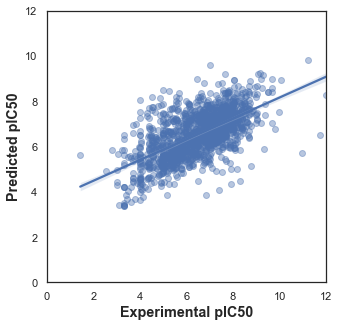

In [197]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# regression

In [198]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [199]:
clf = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 42/42 [01:09<00:00,  1.65s/it]


In [160]:
clf = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:55<00:00,  1.31s/it]


In [161]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.85,0.85,0.53,12.91
DecisionTreeRegressor,0.85,0.85,0.53,0.15
ExtraTreeRegressor,0.85,0.85,0.53,0.14
ExtraTreesRegressor,0.85,0.85,0.53,7.22
RandomForestRegressor,0.80,0.80,0.61,5.14
BaggingRegressor,0.78,0.79,0.64,0.68
XGBRegressor,0.75,0.76,0.68,0.82
MLPRegressor,0.71,0.72,0.74,4.31
HistGradientBoostingRegressor,0.58,0.59,0.89,2.35


In [163]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.34,0.42,1.07,2.50
LGBMRegressor,0.34,0.42,1.07,0.19
NuSVR,0.34,0.41,1.08,4.85
SVR,0.33,0.40,1.09,6.51
XGBRegressor,0.31,0.39,1.10,0.83
RandomForestRegressor,0.30,0.38,1.11,5.15
KNeighborsRegressor,0.27,0.35,1.13,1.41
GradientBoostingRegressor,0.26,0.35,1.14,1.93
BaggingRegressor,0.26,0.34,1.14,0.62


[(0.0, 1.0)]

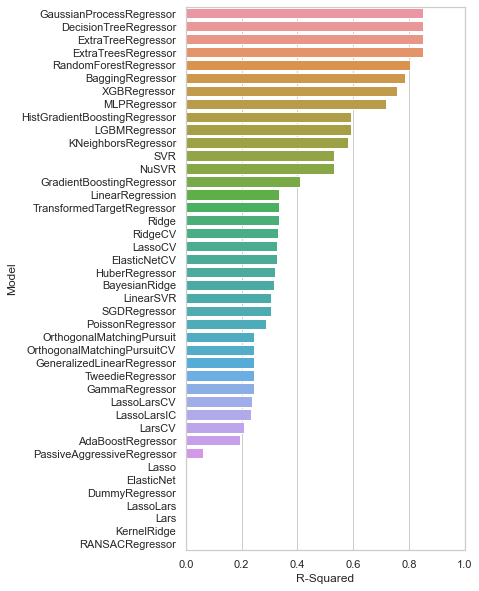

In [164]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

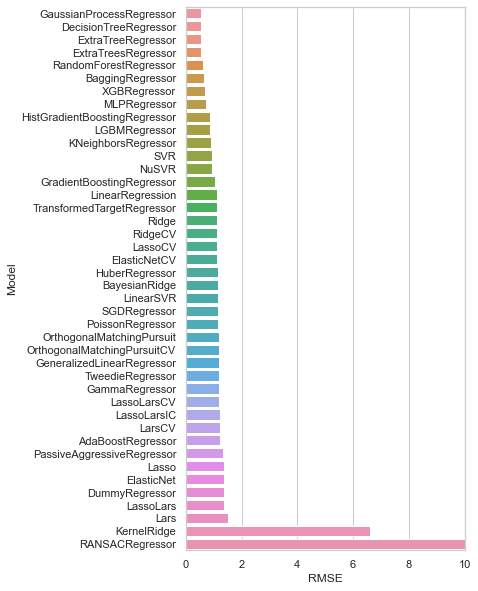

In [165]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 1.0)]

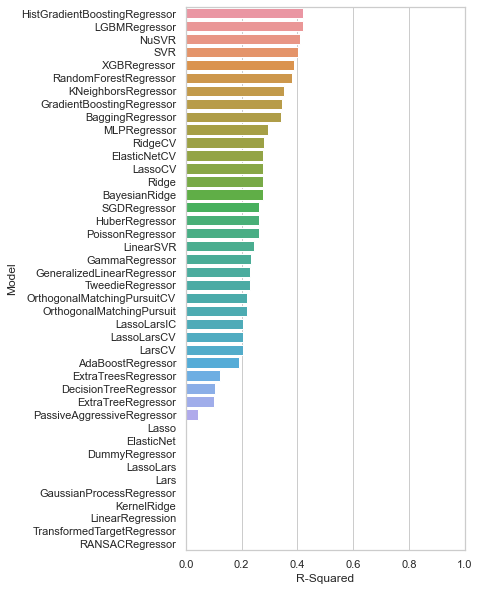

In [166]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

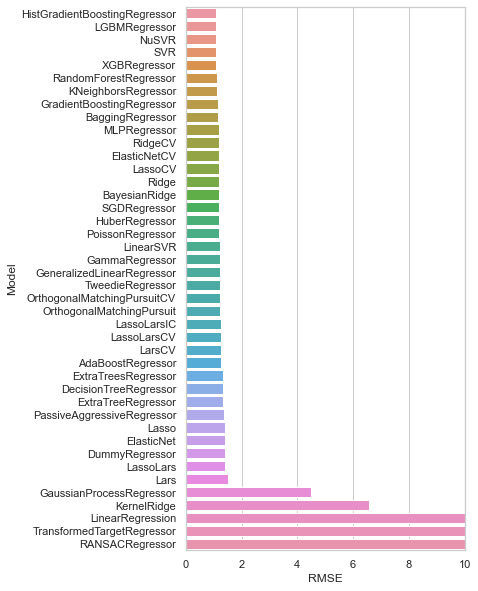

In [167]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

# classification

In [234]:
df_final_X = pd.read_csv('descriptors_output.csv')
X = df_final_X.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7075,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7076,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7077,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [235]:
Y = df_final['pIC50']

In [236]:
Y

0      6.38
1      8.70
2      6.34
3      5.05
4      5.25
       ... 
7074   8.05
7075   8.46
7076   7.10
7077   8.82
7078   8.60
Name: pIC50, Length: 7079, dtype: float64

In [237]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [238]:
X.shape

(7079, 160)

In [239]:
def pic50_to_2class(input):
    bi_class = []

    for i in input:
        if i < 5:
          bi_class.append(0)
        else:
          bi_class.append(1)       
    return pd.Series(bi_class)

In [240]:
Y = pic50_to_2class(Y)

In [241]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
7074    1
7075    1
7076    1
7077    1
7078    1
Length: 7079, dtype: int64

In [242]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [243]:
clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

 21%|██        | 6/29 [00:08<00:30,  1.35s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 66%|██████▌   | 19/29 [00:20<00:05,  1.94it/s]

NuSVC model failed to execute
specified nu is infeasible


 90%|████████▉ | 26/29 [00:25<00:03,  1.12s/it]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:26<00:00,  1.09it/s]


In [244]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.97,0.94,0.94,0.97,0.10
LabelSpreading,0.97,0.94,0.94,0.97,1.64
ExtraTreeClassifier,0.97,0.94,0.94,0.97,0.06
ExtraTreesClassifier,0.97,0.94,0.94,0.97,0.82
LabelPropagation,0.97,0.94,0.94,0.97,0.98
RandomForestClassifier,0.97,0.91,0.91,0.97,0.65
BaggingClassifier,0.97,0.91,0.91,0.96,0.52
XGBClassifier,0.96,0.89,0.89,0.96,0.84
LGBMClassifier,0.94,0.81,0.81,0.93,0.24


In [245]:

clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 21%|██        | 6/29 [00:08<00:30,  1.33s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 66%|██████▌   | 19/29 [00:15<00:04,  2.45it/s]

NuSVC model failed to execute
specified nu is infeasible


 90%|████████▉ | 26/29 [00:19<00:02,  1.14it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:20<00:00,  1.42it/s]


In [246]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.82,0.72,0.72,0.83,0.70
LabelSpreading,0.82,0.72,0.72,0.83,1.30
BaggingClassifier,0.87,0.70,0.70,0.86,0.48
DecisionTreeClassifier,0.85,0.70,0.70,0.85,0.09
ExtraTreeClassifier,0.85,0.69,0.69,0.85,0.05
XGBClassifier,0.87,0.69,0.69,0.86,0.81
ExtraTreesClassifier,0.86,0.69,0.69,0.86,0.76
LGBMClassifier,0.88,0.68,0.68,0.87,0.22
KNeighborsClassifier,0.88,0.68,0.68,0.86,1.45


# deepchem 